## Tâche 7 : el_bands
Objectif : déterminer la bande interdite, trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)et calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.bandstructure import Spin

In [2]:
# clé API Materials Project
mp_key = "hbfwQnxIfLcB2CMDIPBvWEJViltnasHl" # Clé API
mp_id = "mp-8145"  # Identifiant matériau

In [3]:
# Téléchargement de la structure du matériau
with MPRester(mp_key) as m:
    el_bs = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Caractérisation de la bande interdite

  - L'épaisseur de la bande interdite est la distance entre le maximum de la bande de valence et le minimum de la bande de conduction. Cela représente l'énergie que l'électron doit acquérir pour passer de la bande de valence (localisé près du noyau atomique) à la bande de conduction (l'électron peut librement circuler dans le cristal), où il participera à la conductivité électrique.
   - Ce matériau a une bande interdite qui est indirecte. Dans un tel matériau, le minimum de la bande de conduction et le maximum de la bande de valence ne se trouvent pas au même vecteur d'onde. Pour qu'un électron passe d'une bande à l'autre, il doit gagner (ou perdre) de l'énergie mais il doit aussi changer de vecteur d'onde. Ce qui implique l'intervention d'un phonon (quantum de vibration du réseau cristallin) pour conserver la quantité de mouvement. Cette obigation rend les transitions moins probables. On doit changer de k pour avoir le saut d'électrons de la bande de conduction à la bande de valence.
   - L'épaisseur de la bande permet aussi de déterminer la conduction du matériau. Ici, comme la largeur de la bande interdite est supérieure à 2 eV, on en déduit qu'il s'agit d'un matériau isolant.
   - La bande interdite est représentée en rose sur le graphe ci-dessous.

In [4]:
gap = el_bs.get_band_gap()

if gap['direct']==True:
    direct = "directe"
else:
    direct="indirecte"
print("La largeur de la bande interdite est de " + str(gap["energy"])+ " eV")
print("Pour ce matériau, la bande interdite est : " + str(direct))
print("Point de transition :",gap['transition'])

La largeur de la bande interdite est de 3.3013 eV
Pour ce matériau, la bande interdite est : indirecte
Point de transition : \Gamma-F


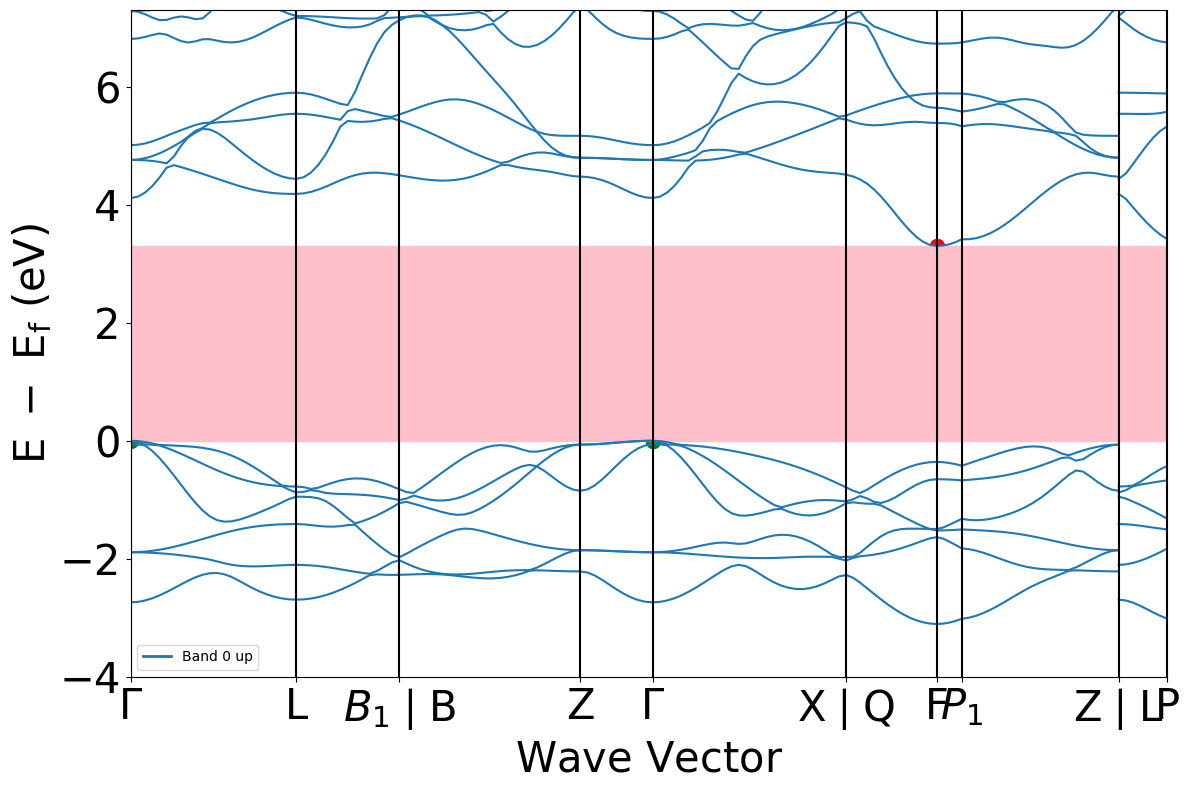

In [5]:
plot_bs = BSPlotter(el_bs) 
data = plot_bs.bs_plot_data()
energy = gap.get('energy')
distance = data.get('ticks').get('distance')
plot_bs.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy, color = "pink")

### Dispersion des bandes de conduction et de valence
On va maintenanant identifier les orientations où les bandes de valence et de conduction montrent la plus forte et la plus faible dispersion.\
\
La dispersion à un point spécifique et dans une direction spécifique, est représentée par le taux de changement de l'énergie E par rapport au vecteur d'onde k, exprimé comme dE/dK.\
\
Sur une bande électronique, la dispersion représente la variation de l'énergie des électrons en fonction de leur vecteur d'onde. Et donc, la direction dans une zone de Brillouin où la pente est maximale représente un maximum de dispersion sur une bande.

VBM: Énergie = 2.0455 eV, k-point = [0. 0. 0.]
CBM: Énergie = 5.3468 eV, k-point = [ 4.81921261e-01  2.22044605e-16 -1.04484766e+00]
Index VBM: defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
Index CBM: defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
Dispersion VBM: max = 1.0718024956472394, min = 0.06599582577355177
Dispersion CBM: max = 2.3443775451976987, min = 0.018942683856552074
Diagramme de la structure des bandes électroniques :


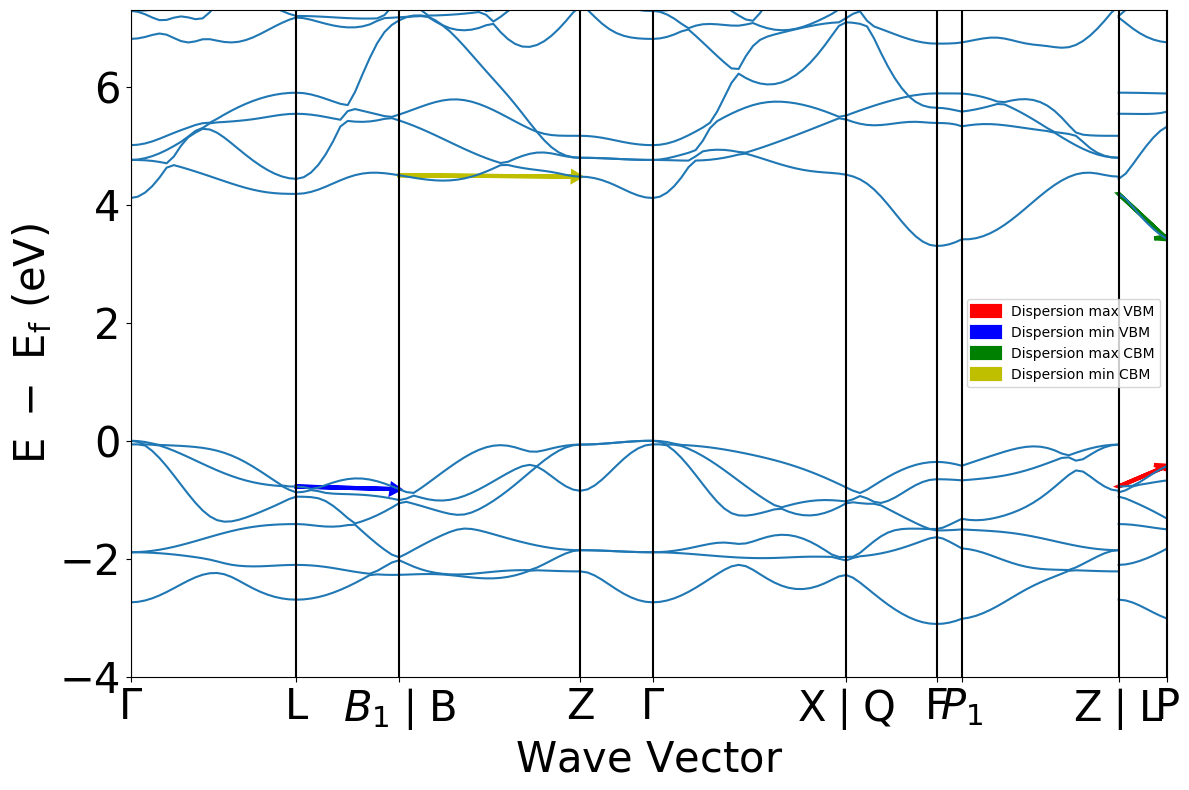

In [6]:
# Récupération des données de la structure de bande
data_band_structure = plot_bs.bs_plot_data()

energie_bandes = data_band_structure.get('energy').get('1')
distance_kpoints = data_band_structure.get('ticks').get('distance')

# Extraction des informations sur le VBM (Valence Band Maximum) et le CBM (Conduction Band Minimum)
vbm_info = el_bs.get_vbm()
cbm_info = el_bs.get_cbm()

print(f"VBM: Énergie = {vbm_info['energy']} eV, k-point = {vbm_info['kpoint'].cart_coords}")
print(f"CBM: Énergie = {cbm_info['energy']} eV, k-point = {cbm_info['kpoint'].cart_coords}")
print(f"Index VBM: {vbm_info['band_index']}")
print(f"Index CBM: {cbm_info['band_index']}")

# Indices des bandes étudiées
indice_vbm = 15
indice_cbm = 16

# Initialisation des pentes (dispersion)
dispersion_vbm = np.zeros(9)
dispersion_cbm = np.zeros(9)

# Points de distance uniques
kpoints_uniques = np.unique(distance_kpoints)

# Calcul de la dispersion des bandes
for i in range(9):
    delta_k = kpoints_uniques[i+1] - kpoints_uniques[i]
    dispersion_vbm[i] = abs(((energie_bandes[i][indice_vbm])[-1] - (energie_bandes[i][indice_vbm])[0]) / delta_k)
    dispersion_cbm[i] = abs(((energie_bandes[i][indice_cbm])[-1] - (energie_bandes[i][indice_cbm])[0]) / delta_k)

# Extraction des valeurs maximales et minimales des dispersions
max_dispersion_vbm = np.max(dispersion_vbm)
min_dispersion_vbm = np.min(dispersion_vbm)
max_dispersion_cbm = np.max(dispersion_cbm)
min_dispersion_cbm = np.min(dispersion_cbm)

print(f"Dispersion VBM: max = {max_dispersion_vbm}, min = {min_dispersion_vbm}")
print(f"Dispersion CBM: max = {max_dispersion_cbm}, min = {min_dispersion_cbm}")
# Affichage du diagramme de la structure de bande
plot_bs.get_plot()

# Ajout des flèches pour représenter les dispersions maximales et minimales
plt.arrow(kpoints_uniques[np.argmax(dispersion_vbm)], (energie_bandes[np.argmax(dispersion_vbm)][indice_vbm])[0],
          kpoints_uniques[np.argmax(dispersion_vbm)+1] - kpoints_uniques[np.argmax(dispersion_vbm)],
          (energie_bandes[np.argmax(dispersion_vbm)][indice_vbm])[-1] - (energie_bandes[np.argmax(dispersion_vbm)][indice_vbm])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True, label='Dispersion max VBM')

plt.arrow(kpoints_uniques[np.argmin(dispersion_vbm)], (energie_bandes[np.argmin(dispersion_vbm)][indice_vbm])[0],
          kpoints_uniques[np.argmin(dispersion_vbm)+1] - kpoints_uniques[np.argmin(dispersion_vbm)],
          (energie_bandes[np.argmin(dispersion_vbm)][indice_vbm])[-1] - (energie_bandes[np.argmin(dispersion_vbm)][indice_vbm])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True, label='Dispersion min VBM')

plt.arrow(kpoints_uniques[np.argmax(dispersion_cbm)], (energie_bandes[np.argmax(dispersion_cbm)][indice_cbm])[0],
          kpoints_uniques[np.argmax(dispersion_cbm)+1] - kpoints_uniques[np.argmax(dispersion_cbm)],
          (energie_bandes[np.argmax(dispersion_cbm)][indice_cbm])[-1] - (energie_bandes[np.argmax(dispersion_cbm)][indice_cbm])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True, label='Dispersion max CBM')

plt.arrow(kpoints_uniques[np.argmin(dispersion_cbm)], (energie_bandes[np.argmin(dispersion_cbm)][indice_cbm])[0],
          kpoints_uniques[np.argmin(dispersion_cbm)+1] - kpoints_uniques[np.argmin(dispersion_cbm)],
          (energie_bandes[np.argmin(dispersion_cbm)][indice_cbm])[-1] - (energie_bandes[np.argmin(dispersion_cbm)][indice_cbm])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True, label='Dispersion min CBM')

# Ajout de la légende et affichage du graphique
plt.legend()
print("Diagramme de la structure des bandes électroniques :")
plt.show()

### Calcul de la masse effective
La masse effective est un concept qui permet de décrire le comportement d'un électron lorsqu'il évolue dans un potentiel. Dans le cas d'un électron libre, la relation de dispersion suit une parabole. Cependant, dans un matériau, le potentiel modifie cette dispersion, ce qui revient à considérer que l'électron possède une masse différente de sa masse réelle (9,109 × 10⁻³¹ kg).

La masse effective est définie comme l'inverse de la dérivée seconde de l'énergie par rapport au vecteur d'onde k, ajustée par des facteurs pour obtenir les bonnes unités. Elle est exprimée en kilogrammes et permet de quantifier la réponse de l'électron lorsqu'il est soumis à une force dans le matériau.

On peut la calculer à l'aide de la relation :

$$
m^* = \frac{\hbar^2 |k|^2}{2E}
$$
 
où :  
- ℏ est la constannte de Planck réduite,
- |k| est la norme du vecteur d'onde,  
- E est l'énergie de l'électron.  

In [7]:
# Constantes physiques
hbar = 1.0545718e-34  # Constante de Planck réduite (J.s)
eV = 1.60218e-19  # Conversion eV -> Joules

# Calcul de la masse effective au sommet de la dernière bande de valence
Energy_valence = el_bs.get_vbm()['energy']
k_valence = el_bs.get_vbm()['kpoint'].frac_coords * 1e10
masse_valence = (hbar**2 * (k_valence[0]**2 + k_valence[1]**2 + k_valence[2]**2)) / (2 * Energy_valence * eV)

# Calcul de la masse effective à la base de la première bande de conduction
Energy_conduction = el_bs.get_cbm()['energy']
k_conduction = el_bs.get_cbm()['kpoint'].frac_coords * 1e10
masse_conduction = (hbar**2 * (k_conduction[0]**2 + k_conduction[1]**2 + k_conduction[2]**2)) / (2 * Energy_conduction * eV)

print(f"La masse effective au sommet de la dernière bande de valence vaut {masse_valence} [kg]\n")
print(f"La masse effective à la base de la première bande de conduction vaut {masse_conduction} [kg]\n")

La masse effective au sommet de la dernière bande de valence vaut 0.0 [kg]

La masse effective à la base de la première bande de conduction vaut 3.245540782877469e-31 [kg]

